# Proof Benchmark Analysis

This notebook analyzes proof request data by joining benchmark results with proof durations.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [62]:
# Load the CSV files
bench_results = pd.read_csv('../data/bench_results.csv')
proof_durations = pd.read_csv('../infra/data/proof_durations.csv')

print(f"Benchmark results: {len(bench_results)} rows")
print(f"Proof durations: {len(proof_durations)} rows")
print(f"\nBenchmark results columns: {list(bench_results.columns)}")
print(f"Proof durations columns: {list(proof_durations.columns)}")

Benchmark results: 1926 rows
Proof durations: 112 rows

Benchmark results columns: ['proof_id', 's3_path', 'param']
Proof durations columns: ['timestamp', 'proof_id', 'task_id', 'duration_secs']


In [63]:
# Join the two dataframes on proof_id
joined_data = bench_results.merge(
    proof_durations, 
    on='proof_id', 
    how='inner'
)

print(f"Joined data: {len(joined_data)} rows")
print(f"\nJoined columns: {list(joined_data.columns)}")
print(f"\nFirst few rows:")
joined_data.head()

Joined data: 112 rows

Joined columns: ['proof_id', 's3_path', 'param', 'timestamp', 'task_id', 'duration_secs']

First few rows:


,proof_id,s3_path,param,timestamp,task_id,duration_secs
0,cli_1762993928676_0,rsp-client,23786726.bin,2025-11-13T00:32:18.388763168+00:00,task_01k9xa0ygee18tn7vxq6ck8w0x,9.670018
1,cli_1762993954703_0,rsp-client,23786727.bin,2025-11-13T00:32:44.632838217+00:00,task_01k9xa1r07ehrv3j45nd0g2cx2,9.808765
2,cli_1762993977498_0,rsp-client,23786728.bin,2025-11-13T00:33:03.930606561+00:00,task_01k9xa2ehse188nh1rh6p4aqdb,6.016462
3,cli_1762993994293_0,rsp-client,23786729.bin,2025-11-13T00:33:26.553253675+00:00,task_01k9xa2yqce589gwadv8k944b8,12.075975
4,cli_1762994028352_0,rsp-client,23786730.bin,2025-11-13T00:34:00.352611607+00:00,task_01k9xa4022fwga6bxh4x9cc6d2,11.742102


In [64]:
# Summary statistics
# print("Duration statistics by param:")
# print(joined_data.groupby('param')['duration_secs'].describe())

print(f"\n\nTotal unique params: {joined_data['param'].nunique()}")
print(f"Total unique s3 paths: {joined_data['s3_path'].nunique()}")

# Print the proof ids of the top 5 longest proofs
print("\n\nTop 5 longest proofs:")
top_5_longest = joined_data.nlargest(5, 'duration_secs')[['proof_id', 'param', 'duration_secs']]
for idx, row in top_5_longest.iterrows():
    print(f"  {row['proof_id']}, {row['param']}: {row['duration_secs']:.2f} seconds")

# Save joined data to CSV
joined_data.to_csv('joined.csv', index=False)
print(f"\n\nSaved joined data to joined.csv")



Total unique params: 112
Total unique s3 paths: 1


Top 5 longest proofs:
  cli_1762994440074_0, 23786758.bin: 14.74 seconds
  cli_1762996519641_0, 23786930.bin: 14.43 seconds
  cli_1762996249943_0, 23786909.bin: 13.77 seconds
  cli_1762995825147_0, 23786876.bin: 13.03 seconds
  cli_1762994841123_0, 23786792.bin: 12.90 seconds


Saved joined data to joined.csv


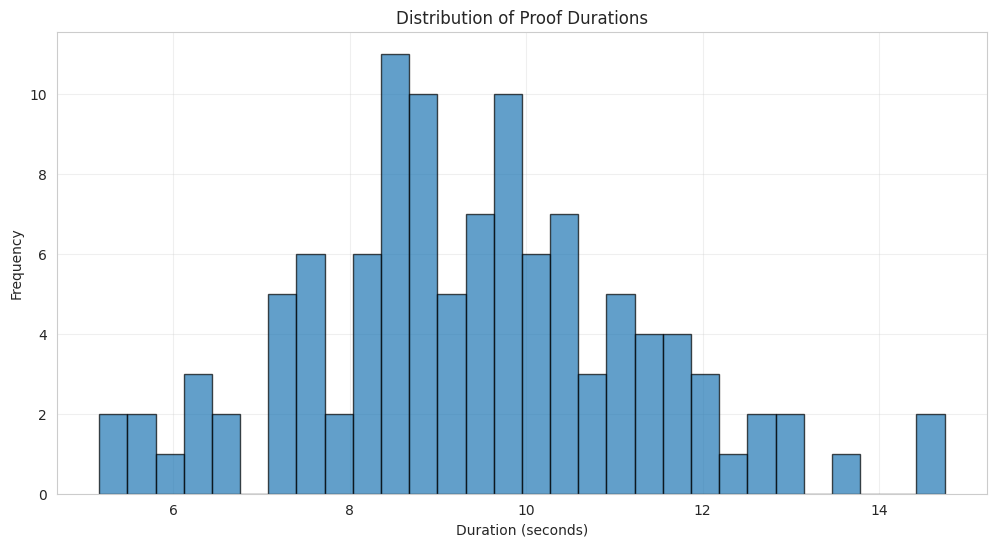

Mean duration: 9.42 seconds
Median duration: 9.34 seconds
Std deviation: 1.91 seconds
Percentage under 12 seconds: 91.07%


In [65]:
# Plot duration distribution
plt.figure(figsize=(12, 6))
plt.hist(joined_data['duration_secs'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Proof Durations')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Mean duration: {joined_data['duration_secs'].mean():.2f} seconds")
print(f"Median duration: {joined_data['duration_secs'].median():.2f} seconds")
print(f"Std deviation: {joined_data['duration_secs'].std():.2f} seconds")
print(f"Percentage under 12 seconds: {(joined_data['duration_secs'] < 12).sum() / len(joined_data) * 100:.2f}%")